# Retail customer segmentation
The aim of this project is to conduct customer segmentation using a clustering algorithm. This will involve dividing a diverse customer base into smaller, homogeneous groups based on shared characteristics like demographics, behavior, or preferences. This strategy is invaluable as it enables businesses to tailor their marketing efforts, products, and services to each segment's specific needs and preferences. By doing so, companies can enhance customer satisfaction, loyalty, and profitability. Moreover, it allows for more efficient resource allocation, helping businesses focus their resources where they are most likely to yield the highest returns. Overall, customer segmentation empowers businesses to create more personalized and targeted experiences, ultimately driving better results and a competitive edge in the market.

# Scope

The dataset has been downloaded from [Kaggle](https://www.kaggle.com/code/karnikakapoor/customer-segmentation-clustering) The data contains customer information collected from a mall's membership cards.

## About the data

The features can be divided into the following four themes:

1. *People:*
* ***ID (nominal):*** Customer's unique identifier
* ***Year_birth (date):*** Birth year
* ***Education (nominal):*** Education level
* ***Marital_Status (nominal):*** Marital status
* ***Income (numerical):*** Annual household income
* ***Kidhome (numerical):*** No. of children in the household
* ***Teenhome (numerical):*** No. of teens in the household
* ***Dt_Customer (date):*** Date of customer's enrolment
* ***Recency (numerical):*** No. of days since last purchase
* ***Complain (nominal/boolean):*** Complained in the last 2 years (1/0 = yes/no)

2. *Products:*
* ***MntWines (numerical):*** Expenditure on wine in last 2 years
* ***MntFruits (numerical):*** Expenditure on fruits in the last 2 years
* ***MntMeatProducts (numerical):*** Expenditure on meat in the last 2 years
* ***MntFishProducts (numerical):*** Expenditure on fish in the last 2 years
* ***MntSweetProducts (numerical):*** Expenditure on sweets in the last 2 years
* ***MntGoldProds (numerical):*** Expenditure on gold in the last 2 years

3. *Promotion:*
* ***NumDealsPurchases (numerical):*** No. of purchases made with a discount
* ***AcceptedCmp1 (nominal/boolean):*** Accepted offer in the 1st campaign (1/0 = yes/no)
* ***AcceptedCmp2 (nominal/boolean):*** Accepted offer in the 2nd campaign (1/0 = yes/no)
* ***AcceptedCmp3 (nominal/boolean):*** Accepted offer in the 3rd campaign (1/0 = yes/no)
* ***AcceptedCmp4 (nominal/boolean):*** Accepted offer in the 4th campaign (1/0 = yes/no)
* ***AcceptedCmp5 (nominal/boolean):*** Accepted offer in the 5th campaign (1/0 = yes/no)
* ***Response (nominal/boolean):*** Accepted offer in the last campaign (1/0 = yes/no)

4. *Place:*
* ***NumWebPurchases (numerical):*** No. of purchases via website
* ***NumCataloguePurchases (numerical):*** No. of purchases via catalogue
* ***NumStorePurchases (numerical):*** No. of purchases in store
* ***NumWebVisitsMonth (numerical):*** No. of visits to website in the last month

## Dependencies

In [1]:
import sys
CONFIG_DIRECTORY = 'C:\\Users\\billy\\OneDrive\\Documents\\Python Scripts\\1. Portfolio\\retail-customer-segmentation\\retail-customer-segmentation'
if CONFIG_DIRECTORY not in sys.path:
    sys.path.insert(0, CONFIG_DIRECTORY)

import ast
import config
import datetime
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
from IPython.display import display
from matplotlib import pyplot as plt
import warnings
plt.style.use('seaborn-v0_8-muted')

## Import data

In [2]:
clean_df = pd.read_csv(config.file_directory('cleaned') + 'cleaned_df.csv')
clean_df = clean_df.sort_index(axis=1, key=lambda col: col.str.lower())
print(f"Number of records: {clean_df.shape[0]}")
clean_df.head()

Number of records: 2212


,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Age,Complain,Dt_Customer,Education,ID,...,NumCatalogPurchases,NumDealsPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Recency,Response,Teenhome,total_spend,Year_Birth
0,False,False,False,False,False,64,False,2012-09-04,Graduation,5524,...,10,3,4,8,7,58,True,0,1617,1957
1,False,False,False,False,False,67,False,2014-03-08,Graduation,2174,...,1,2,2,1,5,38,False,1,27,1954
2,False,False,False,False,False,56,False,2013-08-21,Graduation,4141,...,2,1,10,8,4,26,False,0,776,1965
3,False,False,False,False,False,37,False,2014-02-10,Graduation,6182,...,0,2,4,2,6,26,False,0,53,1984
4,False,False,False,False,False,40,False,2014-01-19,PhD,5324,...,3,5,6,5,5,94,False,0,422,1981


In [3]:
kmeans_df = pd.read_csv(config.file_directory('cleaned') + 'kmeans_df.csv')
print(f"Number of records: {kmeans_df.shape[0]}")
kmeans_df.head(3)

Number of records: 2212


,Age_qt,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Income_qt,is_parent,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Other,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,NumCatalogPurchases_qt,NumDealsPurchases_qt,NumStorePurchases_qt,NumWebPurchases_qt,NumWebVisitsMonth_qt,total_spend_qt
0,0.851675,0,1,0,0,0.242511,0,0,0,0,1,0,0,2.033104,0.648724,-0.258792,1.295363,0.571638,1.404533
1,1.125776,0,1,0,0,-0.182994,1,0,0,0,1,0,0,-0.330873,0.161281,-1.566990,-1.280981,-0.214920,-1.479004
2,0.344154,0,1,0,0,0.833817,0,0,0,0,0,1,0,0.109365,-0.720087,1.042247,1.295363,-0.514923,0.370695


In [4]:
kproto_df = pd.read_csv(config.file_directory('cleaned') + 'kproto_df.csv')
print(f"Number of records: {kproto_df.shape[0]}")
kproto_df.head(3)

Number of records: 2212


,AcceptedCmp1,AcceptedCmp5,Age_qt,Education,Income_qt,is_parent,Marital_Status,NumCatalogPurchases_qt,NumDealsPurchases_qt,NumStorePurchases_qt,NumWebPurchases_qt,NumWebVisitsMonth_qt,total_spend_qt
0,False,False,0.851675,Graduation,0.242511,False,Single,2.033104,0.648724,-0.258792,1.295363,0.571638,1.404533
1,False,False,1.125776,Graduation,-0.182994,True,Single,-0.330873,0.161281,-1.566990,-1.280981,-0.214920,-1.479004
2,False,False,0.344154,Graduation,0.833817,False,Together,0.109365,-0.720087,1.042247,1.295363,-0.514923,0.370695


## Model selection 

### K-means

#### Optimisation

In [5]:
from sklearn.cluster import KMeans
inertia = []
for n_clusters in range(2, 14):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=300).fit(kmeans_df)
    inertia.append(kmeans.inertia_ / n_clusters)
inertias = pd.DataFrame({'n_clusters': range(2, 14), 'inertia': inertia})

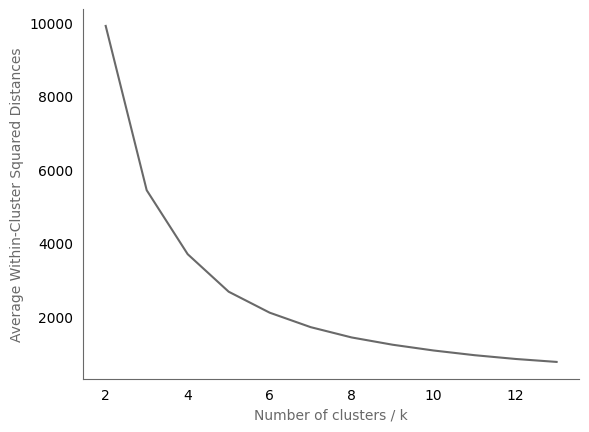

In [6]:
fig, axes = plt.subplots()
axes.tick_params(bottom=False, left=False)
axes.grid(False)
axes.spines[['top', 'right']].set_visible(False)
axes.spines[['left', 'bottom']].set_color('dimgray')

axes.plot(inertias['n_clusters'], inertias['inertia'], color='dimgray')
axes.set_xlabel('Number of clusters / k', color='dimgray')
axes.set_ylabel('Average Within-Cluster Squared Distances', color='dimgray');

#### Evaluation

In [7]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=0, init='random', n_init=300).fit(kmeans_df)

##### Cluster centers

In [8]:
kmeans_centers_df = pd.DataFrame(kmeans.cluster_centers_, columns=list(kmeans_df.columns))
display(kmeans_centers_df.head())

,Age_qt,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Income_qt,is_parent,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Other,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,NumCatalogPurchases_qt,NumDealsPurchases_qt,NumStorePurchases_qt,NumWebPurchases_qt,NumWebVisitsMonth_qt,total_spend_qt
0,0.336743,0.000000e+00,0.493976,0.228916,0.277108,0.878489,0.012048,0.132530,0.433735,-8.673617e-19,0.132530,0.240964,0.060241,0.933136,-0.423436,5.199338,0.582420,-0.750694,0.894663
1,0.059105,2.644836e-02,0.471033,0.282116,0.220403,-0.361827,0.287154,0.096977,0.382872,5.037783e-03,0.212846,0.263224,0.039043,-0.055167,0.652277,-0.227309,0.048418,0.408635,-0.164886
2,0.124248,3.469447e-18,0.544737,0.225000,0.230263,0.952066,0.034211,0.107895,0.372368,2.631579e-03,0.222368,0.255263,0.039474,0.907590,-0.445811,0.668139,0.562774,-0.786432,0.949903
3,-0.297150,5.739130e-02,0.497391,0.259130,0.186087,-0.885920,0.280000,0.106087,0.406957,1.739130e-03,0.210435,0.257391,0.017391,-5.199338,-0.302736,-0.903903,-1.096721,0.545815,-1.152513


##### Cluster cardinality & magnitude

In [9]:
from scipy.spatial.distance import euclidean

# Cluster cardinality
kmeans_labels = pd.DataFrame(np.transpose(kmeans.labels_), columns=["labels"])
kmeans_cardinality = kmeans_labels["labels"].value_counts().sort_index()

# Cluster magnitude
data = pd.DataFrame.from_records(np.expand_dims(kmeans_df, axis=1), columns=["point"])
data["label"] = kmeans.labels_
data["center"] = data["label"].apply(lambda label: kmeans.cluster_centers_[label])
data["distance"] = data.apply(lambda row: euclidean(row["point"], row["center"]), axis=1)
kmeans_magnitude = data.groupby(["label"])["distance"].sum()

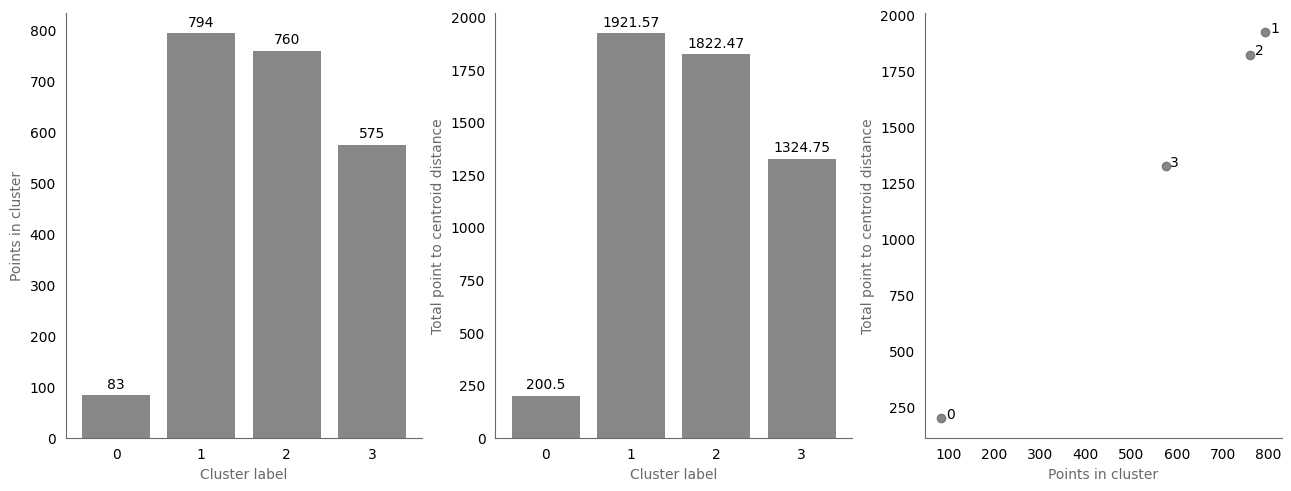

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(6.4*2, 4.8), constrained_layout=True)
for ax in axes:
    ax.tick_params(bottom=False, left=False)
    ax.grid(False)
    ax.spines[['top', 'right']].set_visible(False)
    ax.spines[['left', 'bottom']].set_color('dimgray')

# Cluster cardinality bar chart
cardinality_bars = axes[0].bar(kmeans_cardinality.index, kmeans_cardinality.values, color='dimgray', alpha=0.8)
axes[0].set_xlabel('Cluster label', color='dimgray')
axes[0].set_ylabel('Points in cluster', color='dimgray')
axes[0].bar_label(cardinality_bars, padding=3)

# Cluster magnitude bar chart
magnitude_bars = axes[1].bar(kmeans_magnitude.index, kmeans_magnitude.values, color='dimgray', alpha=0.8)
axes[1].set_xlabel('Cluster label', color='dimgray')
axes[1].set_ylabel('Total point to centroid distance', color='dimgray')
axes[1].bar_label(magnitude_bars, padding=3)

# Cardinality vs magnitude
axes[2].scatter(kmeans_cardinality.values, kmeans_magnitude.values, color='dimgray', alpha=0.8)
axes[2].set_xlabel('Points in cluster', color='dimgray')
axes[2].set_ylabel('Total point to centroid distance', color='dimgray')
i=0
for x, y in zip(kmeans_cardinality, kmeans_magnitude):
    axes[2].annotate(i, (x + 10, y))
    i+=1

##### Visual check of clusters

In [11]:
kmeans_df['cluster'] = kmeans.labels_

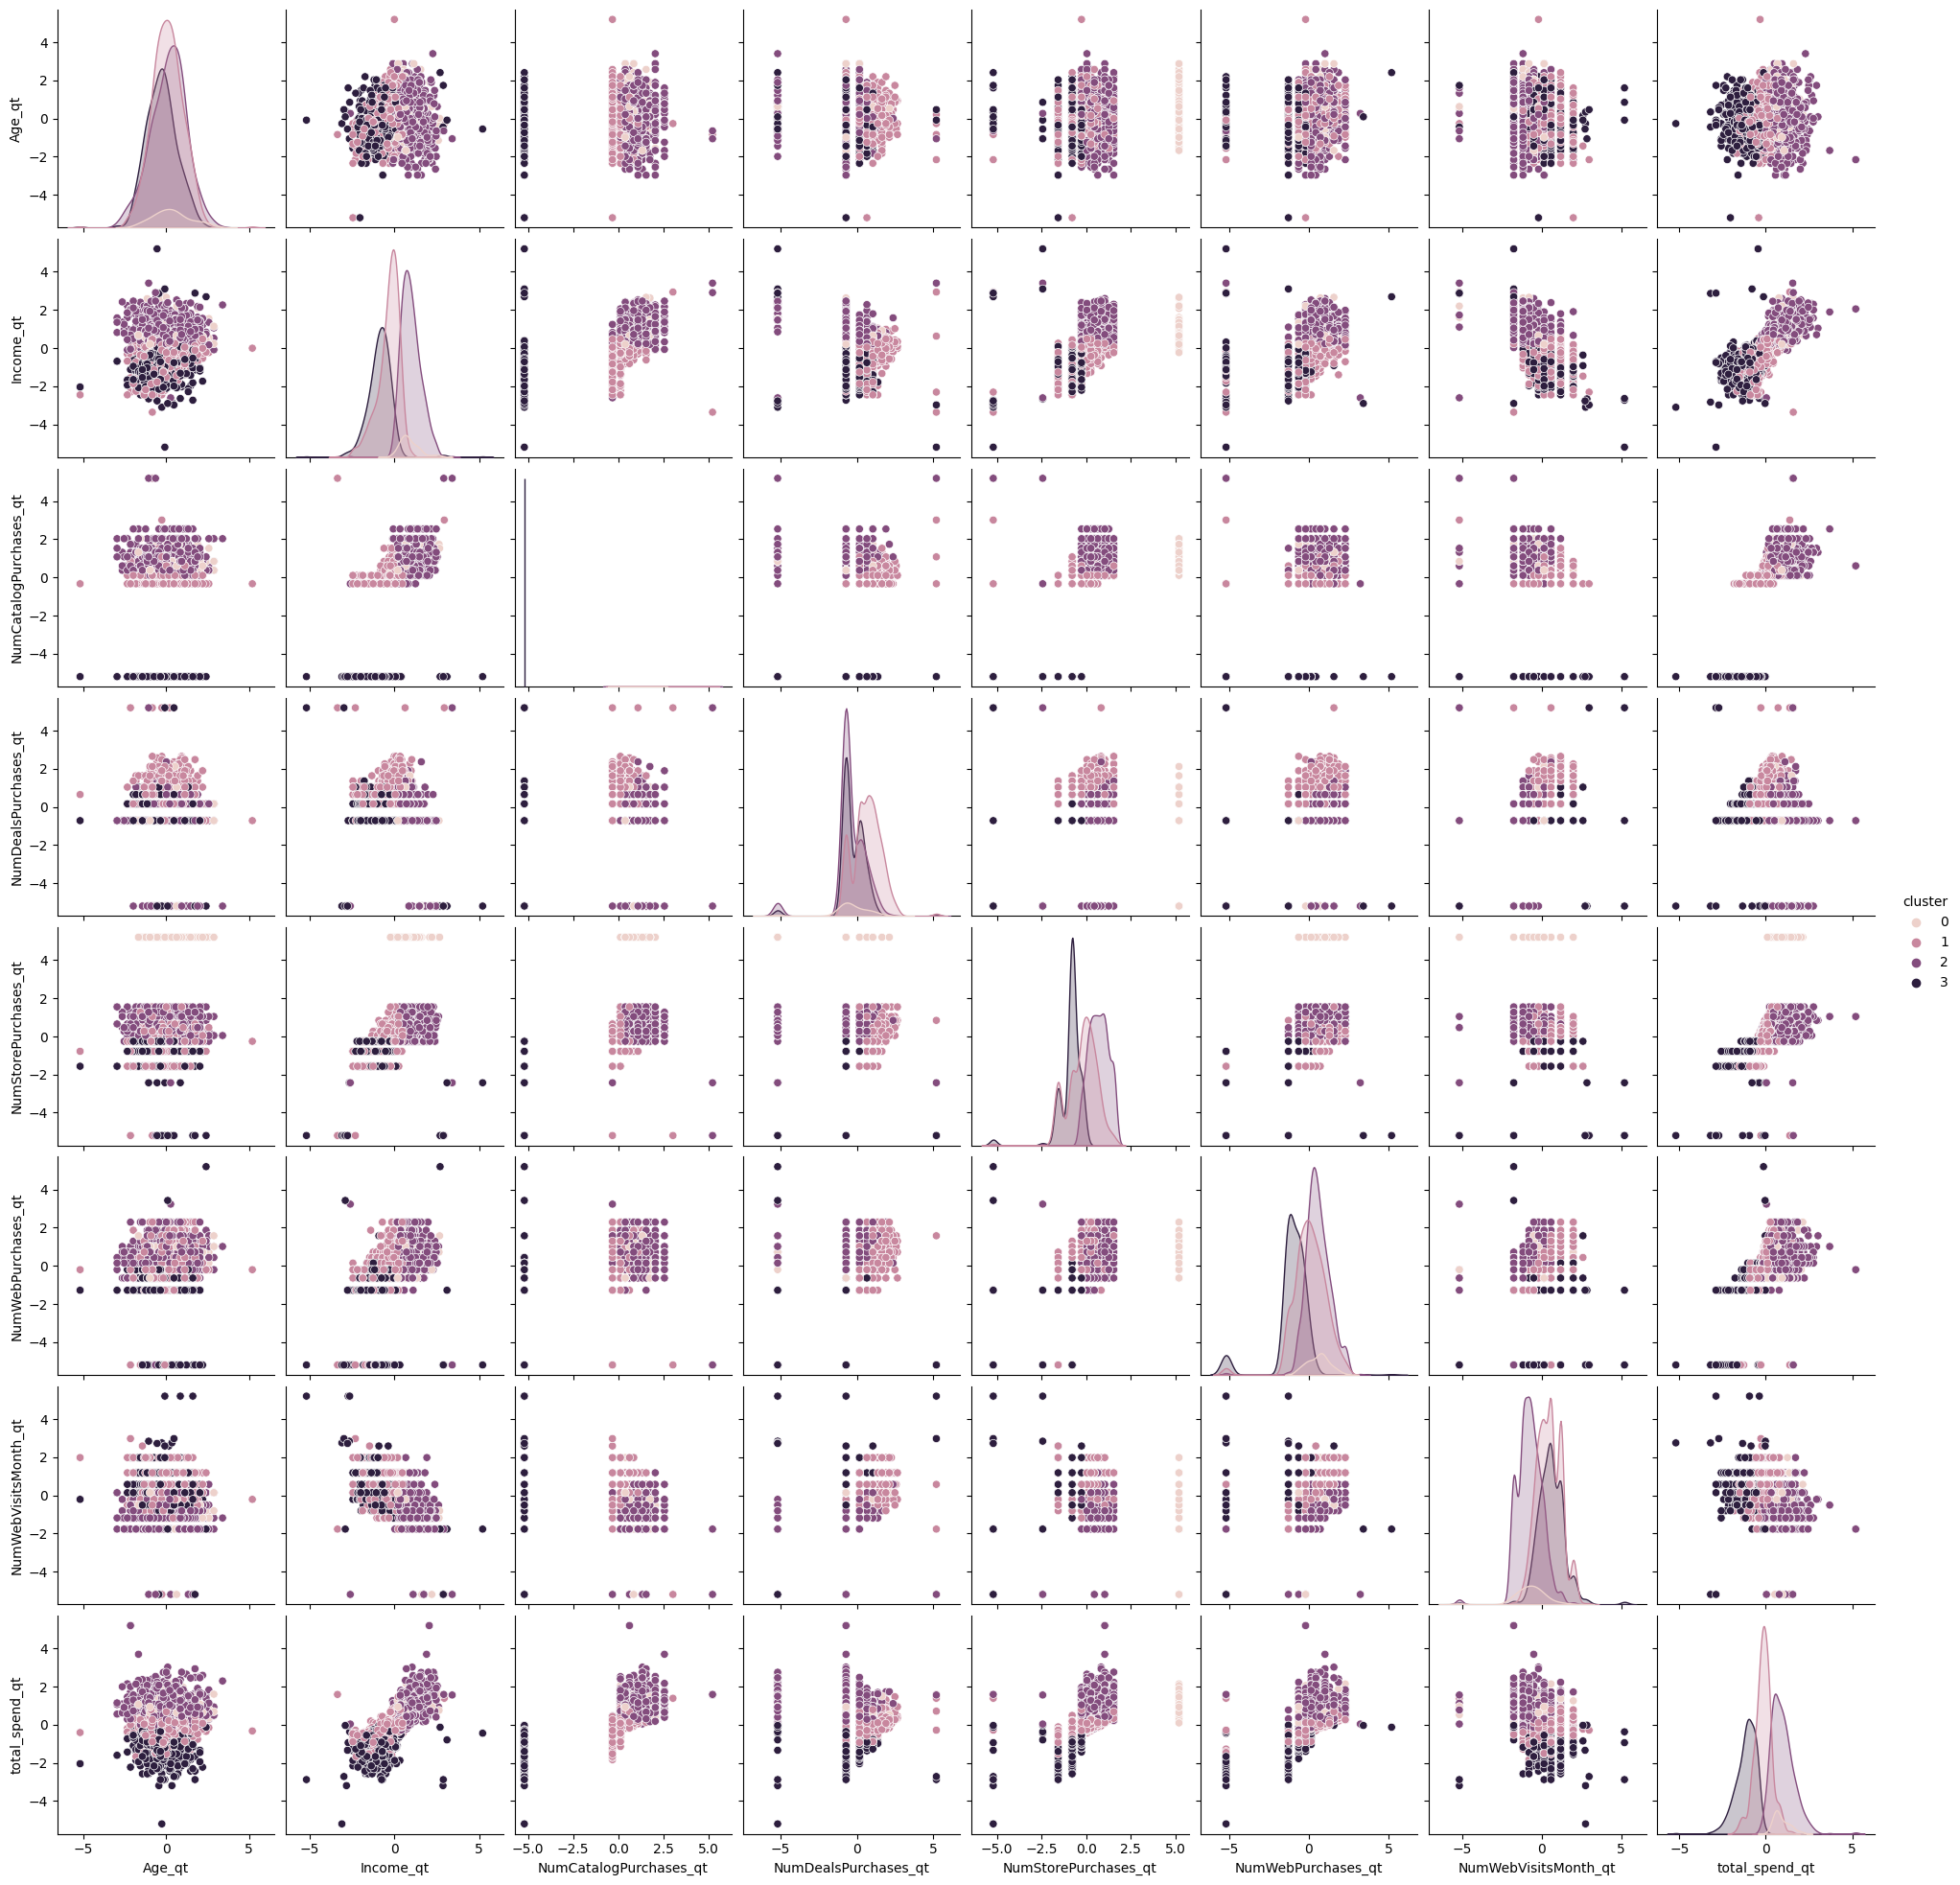

In [12]:
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")
qt_cols = list(kmeans_df.filter(regex='_qt',axis=1).columns)
qt_cols.append('cluster')
sns.pairplot(kmeans_df.loc[:, qt_cols], hue='cluster')

C:\Users\billy\AppData\Local\Temp\ipykernel_26152\4091058668.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(list(kmeans_centers_df.columns), rotation=80);


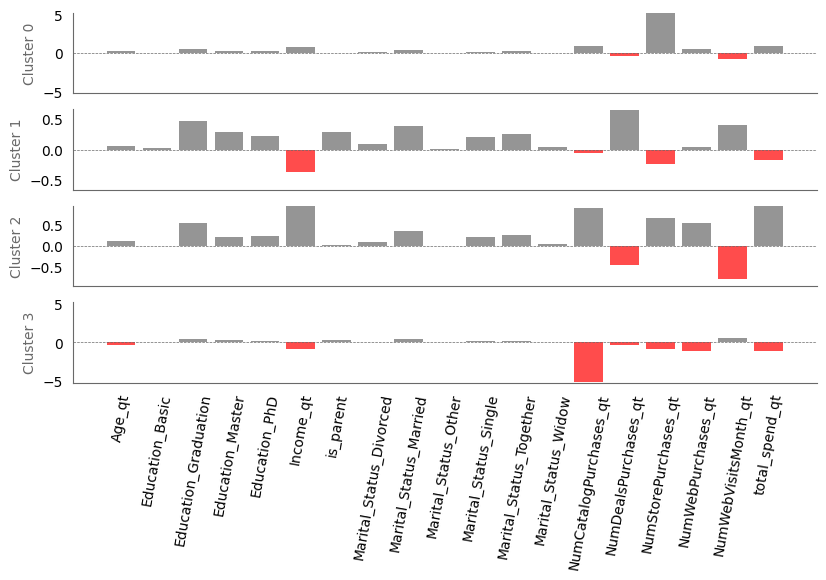

In [13]:
fig, axes = plt.subplots(k, 1, figsize=(6.4*1.5, 4.8), sharex=True)
for ax in axes:
    ax.tick_params(bottom=False, left=False)
    ax.grid(False)
    ax.spines[['top', 'right']].set_visible(False)
    ax.spines[['left', 'bottom']].set_color('dimgray')

for i, ax in enumerate(axes):
    X = kmeans_centers_df.loc[i, :].index
    Y = kmeans_centers_df.loc[i, :]
    colors = ['dimgray' if y > 0 else 'red' for y in Y]
    ylim = 1.01 * np.max(np.abs(Y))
    ax.bar(X, Y, color=colors, alpha=0.7)
    ax.axhline(color='dimgray', linestyle='--', linewidth=0.5)
    ax.set_ylabel(f'Cluster {i}', color='dimgray')
    ax.set_ylim(-ylim, ylim)
ax.set_xticklabels(list(kmeans_centers_df.columns), rotation=80);

#### Profile

In [14]:
clean_df['kmeans_cluster'] = kmeans.labels_

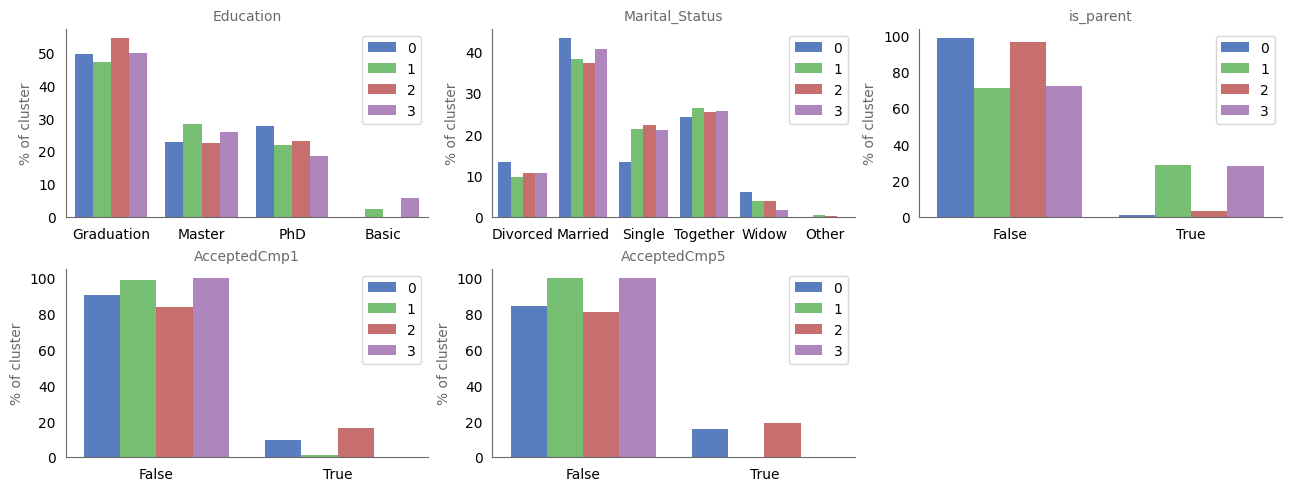

In [15]:
cat_cols = ['Education', 'Marital_Status', 'is_parent', 'AcceptedCmp1', 'AcceptedCmp5']
fig, axes = plt.subplots(2, 3, figsize=(6.4*2, 4.8), constrained_layout=True)
axes = axes.flatten()
for ax in axes:
    ax.tick_params(bottom=False, left=False)
    ax.grid(False)
    ax.spines[['top', 'right']].set_visible(False)
    ax.spines[['left', 'bottom']].set_color('dimgray')

for ax, col in zip(axes, cat_cols):
    data = clean_df.groupby(['kmeans_cluster', col])['kmeans_cluster'].count() / clean_df.groupby(['kmeans_cluster'])['kmeans_cluster'].count() * 100
    data.rename('perc', inplace=True)
    data = data.reset_index()
    data[['kmeans_cluster', col]] = data[['kmeans_cluster', col]].astype(str)
    sns.barplot(x=col, y='perc', hue='kmeans_cluster', data=data, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel('% of cluster', color='dimgray', size=10)
    ax.set_title(col, color='dimgray', size=10)
    ax.legend(loc='upper right')
fig.delaxes(axes[5])

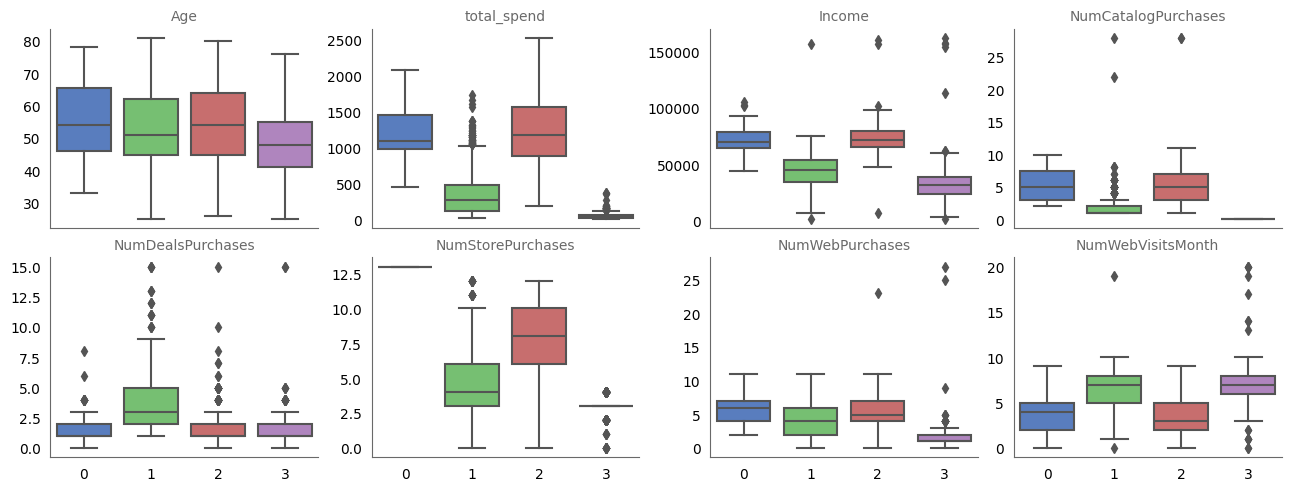

In [16]:
num_cols = ['Age', 'total_spend', 'Income', 'NumCatalogPurchases', 'NumDealsPurchases', 'NumStorePurchases', 'NumWebPurchases', 'NumWebVisitsMonth']
fig, axes = plt.subplots(2, 4, figsize=(6.4*2, 4.8), constrained_layout=True, sharex=True)
axes = axes.flatten()
for ax in axes:
    ax.tick_params(bottom=False, left=False)
    ax.grid(False)
    ax.spines[['top', 'right']].set_visible(False)
    ax.spines[['left', 'bottom']].set_color('dimgray')

for ax, col in zip(axes, num_cols):
    sns.boxplot(data=clean_df, x='kmeans_cluster', y=col, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(col, color='dimgray', size=10)

### K-prototypes

* https://medium.com/analytics-vidhya/customer-segmentation-using-k-prototypes-algorithm-in-python-aad4acbaaede
* https://towardsdatascience.com/the-k-prototype-as-clustering-algorithm-for-mixed-data-type-categorical-and-numerical-fe7c50538ebb
* https://medium.com/@keswani-rohitkumar/k-prototypes-clustering-algorithm-f5d8e09a0104
* https://kprototypes.readthedocs.io/en/latest/api.html#initialization
* https://towardsdatascience.com/clustering-on-numerical-and-categorical-features-6e0ebcf1cbad

#### Optimisation

In [17]:
cat_cols = list(kproto_df.select_dtypes(['object','bool']).columns)
cat_cols_pos = [kproto_df.columns.get_loc(col) for col in cat_cols]
print(f"Categorical columns: {cat_cols}")
print(f"Categorical columns position  : {cat_cols_pos}")

Categorical columns: ['AcceptedCmp1', 'AcceptedCmp5', 'Education', 'is_parent', 'Marital_Status']
Categorical columns position  : [0, 1, 3, 5, 6]


In [18]:
from kmodes.kprototypes import KPrototypes
cost = []
for n_clusters in range(2, 14):
    kprototype = KPrototypes(n_clusters=n_clusters, random_state=0, n_init=1)
    kprototype.fit_predict(kproto_df.to_numpy(), categorical=cat_cols_pos)
    cost.append(kprototype.cost_ / n_clusters)
costs = pd.DataFrame({'n_clusters': range(2, 14), 'cost': cost})

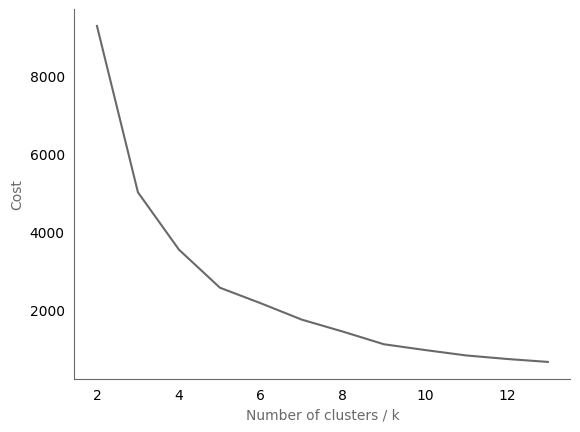

In [19]:
fig, axes = plt.subplots()
axes.tick_params(bottom=False, left=False)
axes.grid(False)
axes.spines[['top', 'right']].set_visible(False)
axes.spines[['left', 'bottom']].set_color('dimgray')

axes.plot(costs['n_clusters'], costs['cost'], color='dimgray')
axes.set_xlabel('Number of clusters / k', color='dimgray')
axes.set_ylabel('Cost', color='dimgray');

#### Evaluation

In [20]:
k = 5
kprototype = KPrototypes(n_clusters=k, random_state=0, n_init=10)
kprototype.fit_predict(kproto_df.to_numpy(), categorical=cat_cols_pos)
kproto_df['cluster'] = kprototype.labels_ # Add cluster label to the dataframe

##### Cluster cardinality

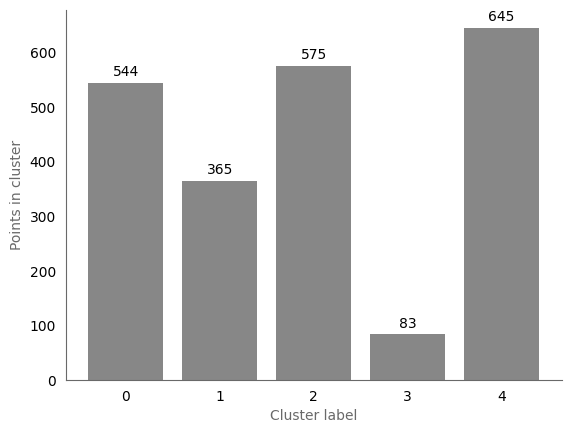

In [21]:
kproto_labels = pd.DataFrame(np.transpose(kprototype.labels_), columns=["labels"])
kproto_cardinality = kproto_labels["labels"].value_counts().sort_index()

fig, axes = plt.subplots(1, 1, figsize=(6.4, 4.8))
axes.tick_params(bottom=False, left=False)
axes.grid(False)
axes.spines[['top', 'right']].set_visible(False)
axes.spines[['left', 'bottom']].set_color('dimgray')
cardinality_bars = axes.bar(kproto_cardinality.index, kproto_cardinality.values, color='dimgray', alpha=0.8)
axes.set_xlabel('Cluster label', color='dimgray')
axes.set_ylabel('Points in cluster', color='dimgray')
axes.bar_label(cardinality_bars, padding=3);

##### Cluster centers

In [22]:
kproto_centers_df = kproto_df.groupby('cluster').agg({'AcceptedCmp1': lambda x: x.value_counts().index[0],
                                                      'AcceptedCmp5': lambda x: x.value_counts().index[0],
                                                      'Age_qt': 'mean',
                                                      'Education': lambda x: x.value_counts().index[0],
                                                      'Income_qt': 'mean',
                                                      'is_parent': lambda x: x.value_counts().index[0],
                                                      'Marital_Status': lambda x: x.value_counts().index[0],
                                                      'NumCatalogPurchases_qt': 'mean',
                                                      'NumDealsPurchases_qt': 'mean',
                                                      'NumStorePurchases_qt': 'mean',
                                                      'NumWebPurchases_qt': 'mean',
                                                      'NumWebVisitsMonth_qt': 'mean',
                                                      'total_spend_qt': 'mean'}
                                                     )
display(kproto_centers_df.head())

,AcceptedCmp1,AcceptedCmp5,Age_qt,Education,Income_qt,is_parent,Marital_Status,NumCatalogPurchases_qt,NumDealsPurchases_qt,NumStorePurchases_qt,NumWebPurchases_qt,NumWebVisitsMonth_qt,total_spend_qt
cluster,,,,,,,,,,,,,
0,False,False,-0.008038,Graduation,1.122798,False,Married,1.002699,-0.810701,0.618169,0.378419,-1.056146,1.075785
1,False,False,-0.239058,Graduation,-0.771849,False,Married,-0.216621,0.178190,-0.864404,-0.695790,0.263841,-0.542969
2,False,False,-0.297150,Graduation,-0.885920,False,Married,-5.199338,-0.302736,-0.903903,-1.096721,0.545815,-1.152513
3,False,False,0.336743,Graduation,0.878489,False,Married,0.933136,-0.423436,5.199338,0.582420,-0.750694,0.894663
4,False,False,0.361219,Graduation,0.166205,False,Married,0.278395,0.860579,0.475234,0.797296,0.317844,0.316222


##### Visual check of clusters

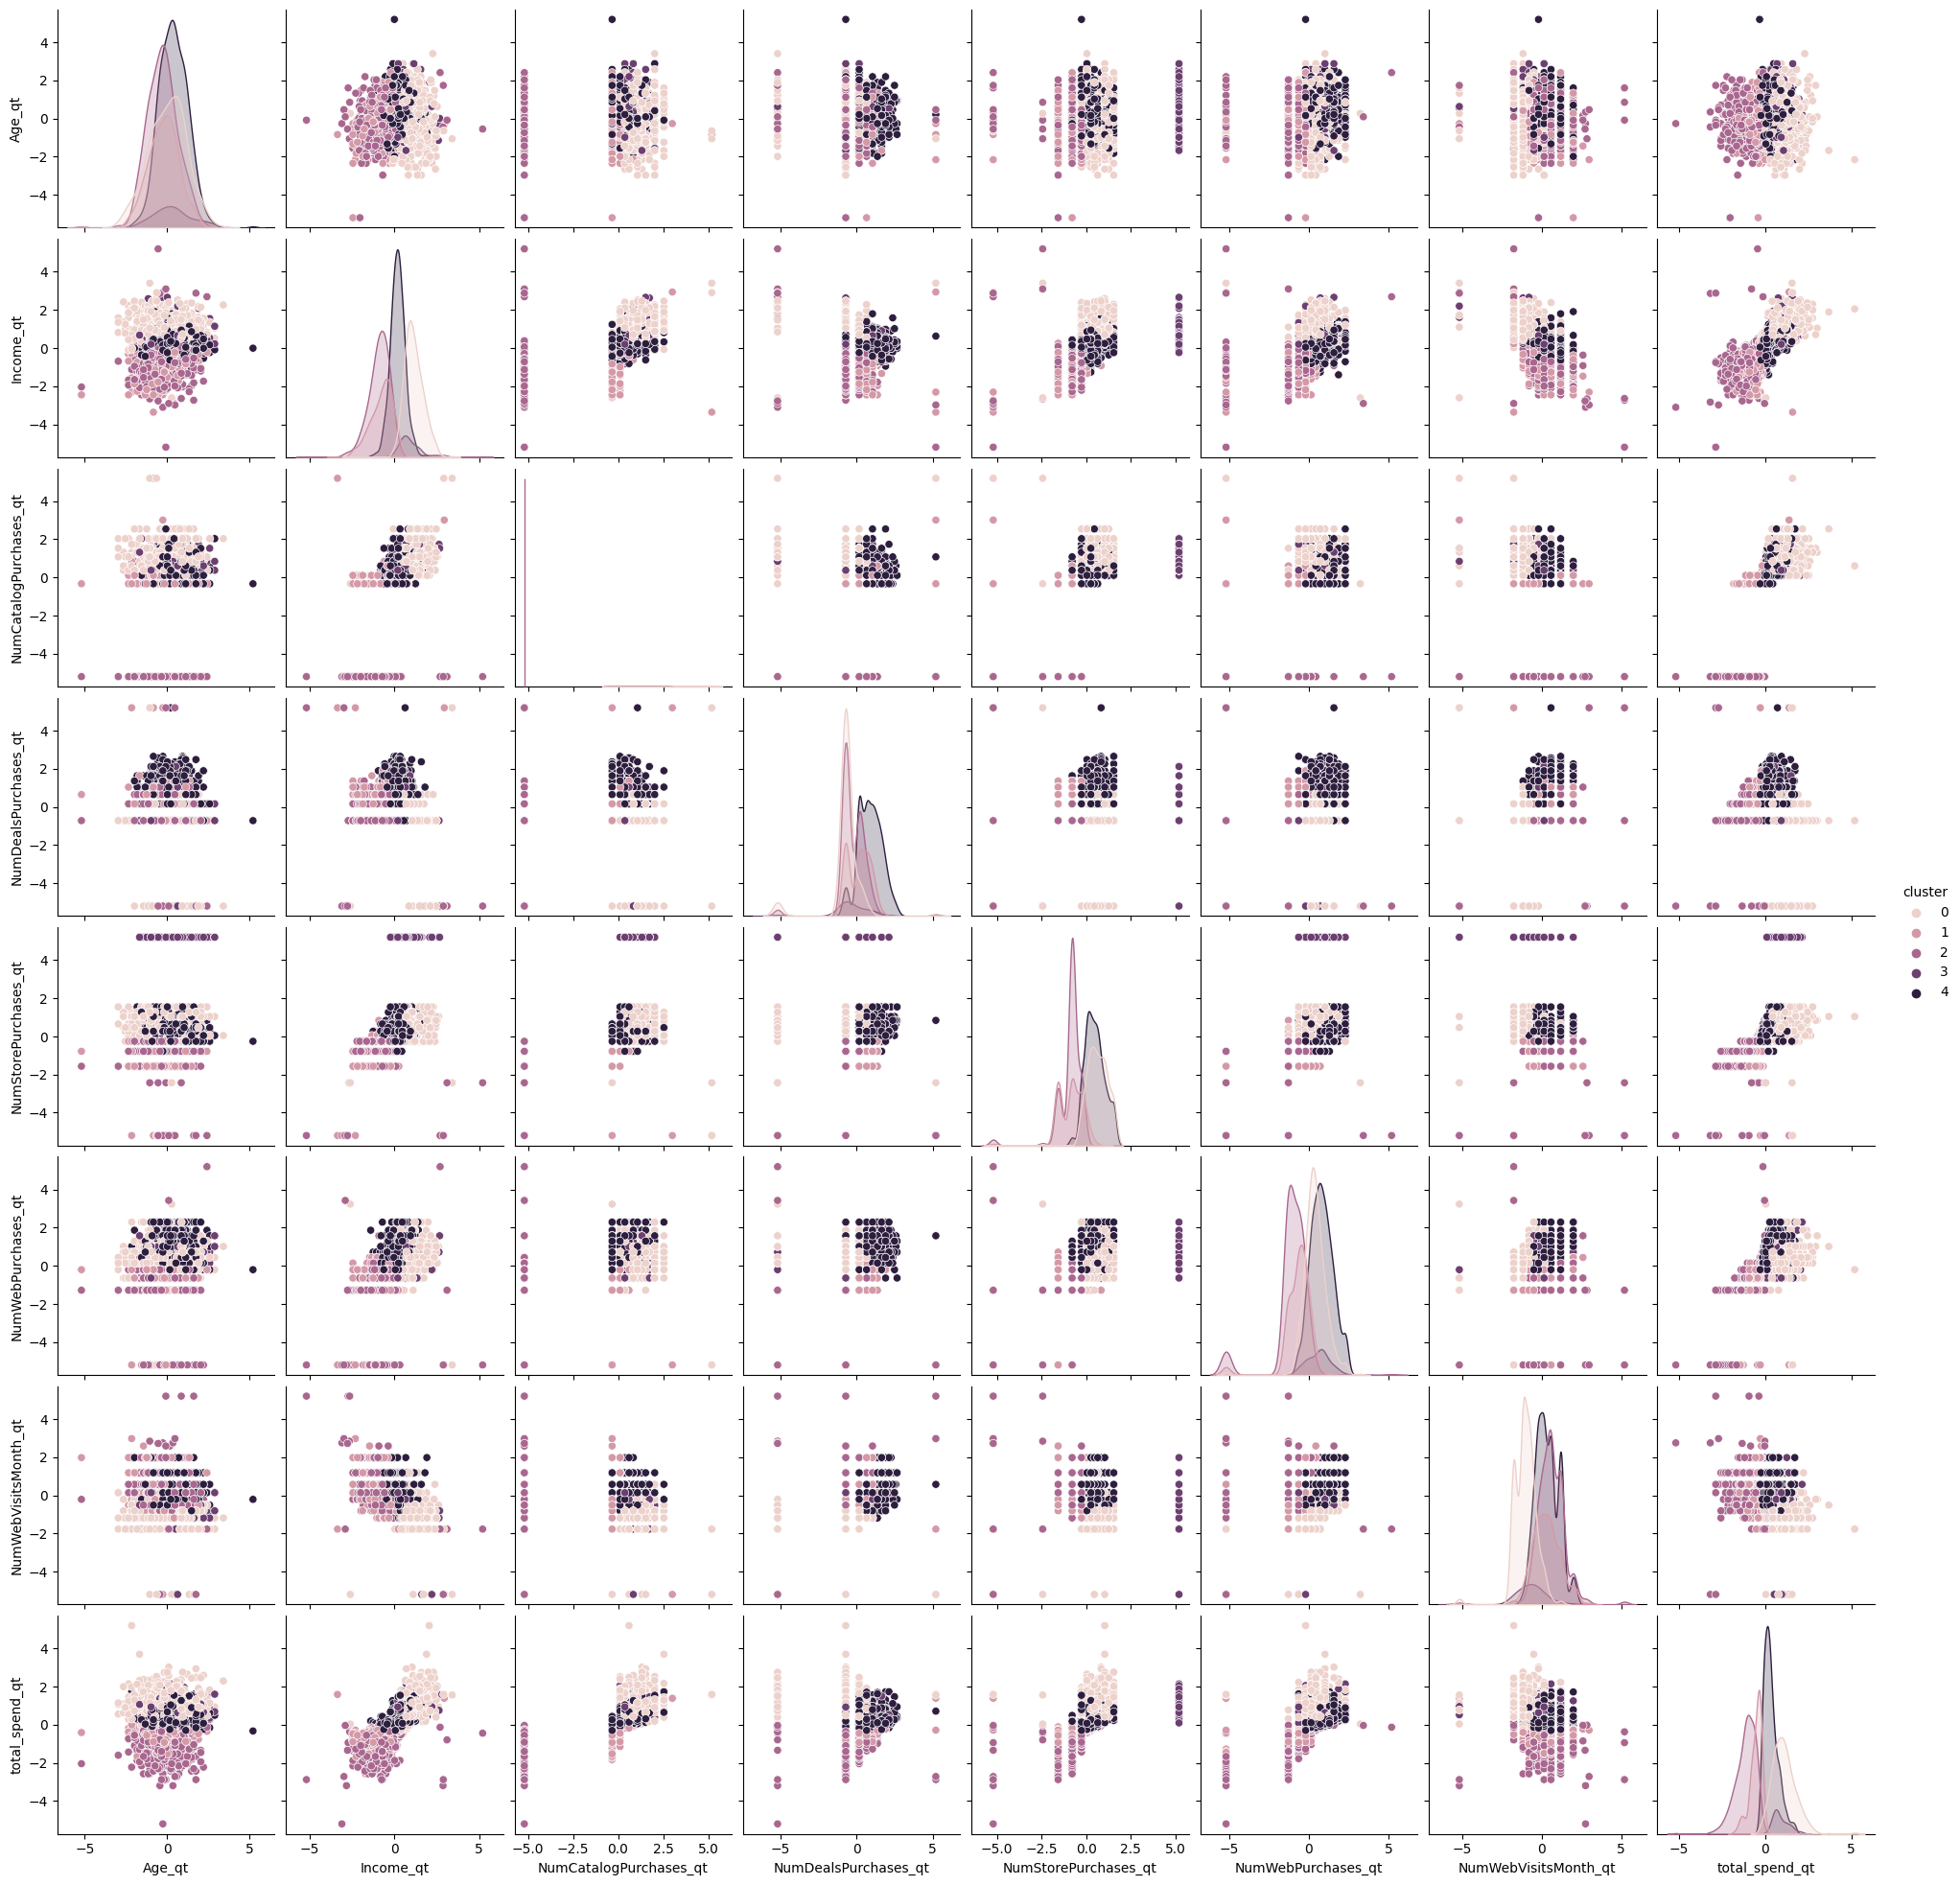

In [23]:
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")
qt_cols = list(kproto_df.filter(regex='_qt',axis=1).columns)
qt_cols.append('cluster')
sns.pairplot(kproto_df.loc[:, qt_cols], hue='cluster')

C:\Users\billy\AppData\Local\Temp\ipykernel_26152\4021944582.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(num_cols, rotation=70);


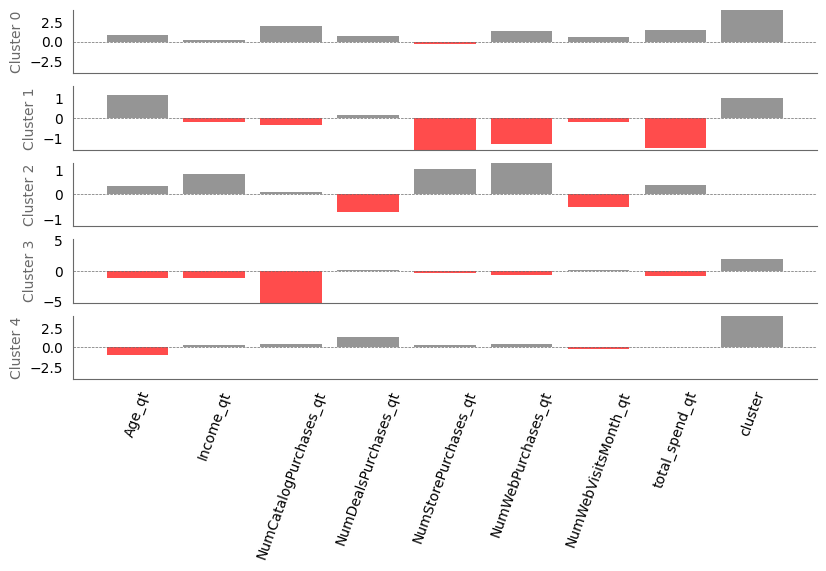

In [24]:
fig, axes = plt.subplots(k, 1, figsize=(6.4*1.5, 4.8), sharex=True)
for ax in axes:
    ax.tick_params(bottom=False, left=False)
    ax.grid(False)
    ax.spines[['top', 'right']].set_visible(False)
    ax.spines[['left', 'bottom']].set_color('dimgray')

for i, ax in enumerate(axes):
    num_cols = list(kproto_df.select_dtypes(['number']).columns)
    X = kproto_df.loc[i, num_cols].index
    Y = kproto_df.loc[i, num_cols]
    colors = ['dimgray' if y > 0 else 'red' for y in Y]
    ylim = 1.01 * np.max(np.abs(Y))
    ax.bar(X, Y, color=colors, alpha=0.7)
    ax.axhline(color='dimgray', linestyle='--', linewidth=0.5)
    ax.set_ylabel(f'Cluster {i}', color='dimgray')
    ax.set_ylim(-ylim, ylim)
ax.set_xticklabels(num_cols, rotation=70);

#### Profile

In [25]:
clean_df['kproto_cluster'] = kmeans.labels_

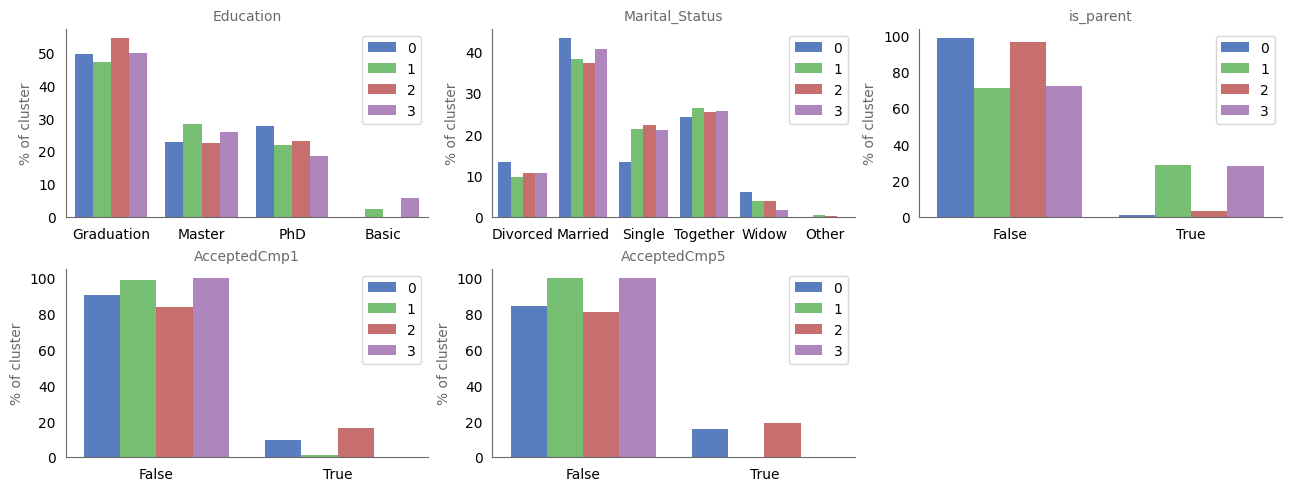

In [26]:
cat_cols = ['Education', 'Marital_Status', 'is_parent', 'AcceptedCmp1', 'AcceptedCmp5']
fig, axes = plt.subplots(2, 3, figsize=(6.4*2, 4.8), constrained_layout=True)
axes = axes.flatten()
for ax in axes:
    ax.tick_params(bottom=False, left=False)
    ax.grid(False)
    ax.spines[['top', 'right']].set_visible(False)
    ax.spines[['left', 'bottom']].set_color('dimgray')

for ax, col in zip(axes, cat_cols):
    data = clean_df.groupby(['kproto_cluster', col])['kproto_cluster'].count() / clean_df.groupby(['kproto_cluster'])['kproto_cluster'].count() * 100
    data.rename('perc', inplace=True)
    data = data.reset_index()
    data[['kproto_cluster', col]] = data[['kproto_cluster', col]].astype(str)
    sns.barplot(x=col, y='perc', hue='kproto_cluster', data=data, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel('% of cluster', color='dimgray', size=10)
    ax.set_title(col, color='dimgray', size=10)
    ax.legend(loc='upper right')
fig.delaxes(axes[5])

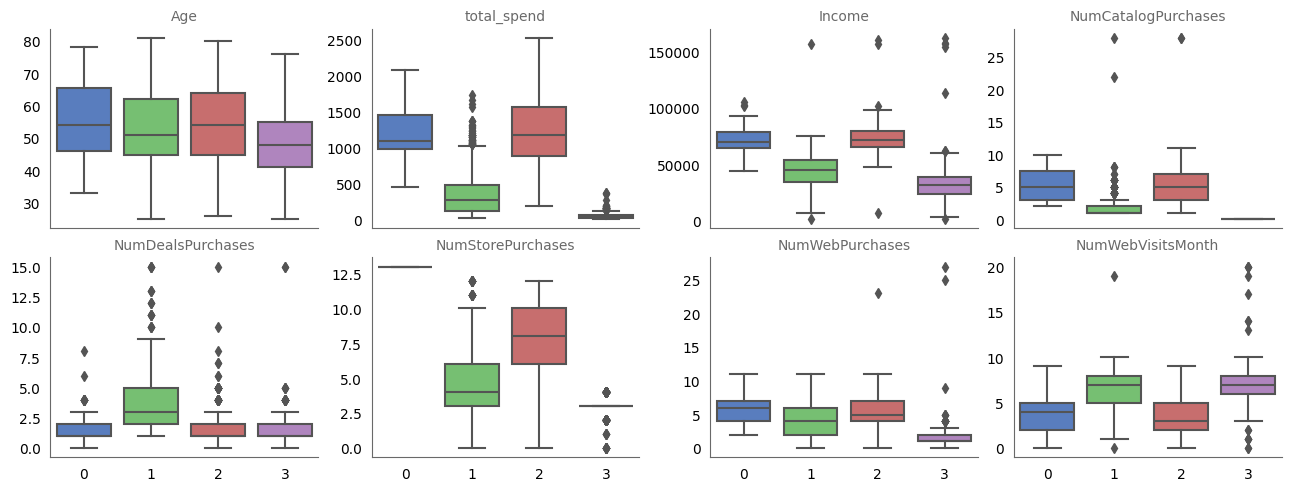

In [27]:
num_cols = ['Age', 'total_spend', 'Income', 'NumCatalogPurchases', 'NumDealsPurchases', 'NumStorePurchases', 'NumWebPurchases', 'NumWebVisitsMonth']
fig, axes = plt.subplots(2, 4, figsize=(6.4*2, 4.8), constrained_layout=True, sharex=True)
axes = axes.flatten()
for ax in axes:
    ax.tick_params(bottom=False, left=False)
    ax.grid(False)
    ax.spines[['top', 'right']].set_visible(False)
    ax.spines[['left', 'bottom']].set_color('dimgray')

for ax, col in zip(axes, num_cols):
    sns.boxplot(data=clean_df, x='kproto_cluster', y=col, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(col, color='dimgray', size=10)

### Hierarchical clustering

* https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/
* https://bpostance.github.io/posts/clustering-mixed-data/
* https://medium.com/analytics-vidhya/gowers-distance-899f9c4bd553
* https://stats.stackexchange.com/questions/395037/clustering-data-using-gower-and-kmeans
* https://medium.com/analytics-vidhya/the-ultimate-guide-for-clustering-mixed-data-1eefa0b4743b
* https://stackoverflow.com/questions/15951711/how-to-compute-cluster-assignments-from-linkage-distance-matrices
* https://stackoverflow.com/questions/42692097/what-is-the-t-threshold-parameter-in-scipys-fcluster-fclusterdata

#### Optimisation

In [28]:
from scipy.cluster.hierarchy import linkage
from scipy.spatial.distance import squareform
import gower

# Z = linkage(kmeans_df, 'ward')
Z_v = gower.gower_matrix(kproto_df.iloc[:, :-1]) # vector-form distance vector
Z_sq = squareform(Z_v, force='tovector') # square-form distance matrix
linkage_matrix = linkage(Z_sq, method='complete')

Leaves = 8


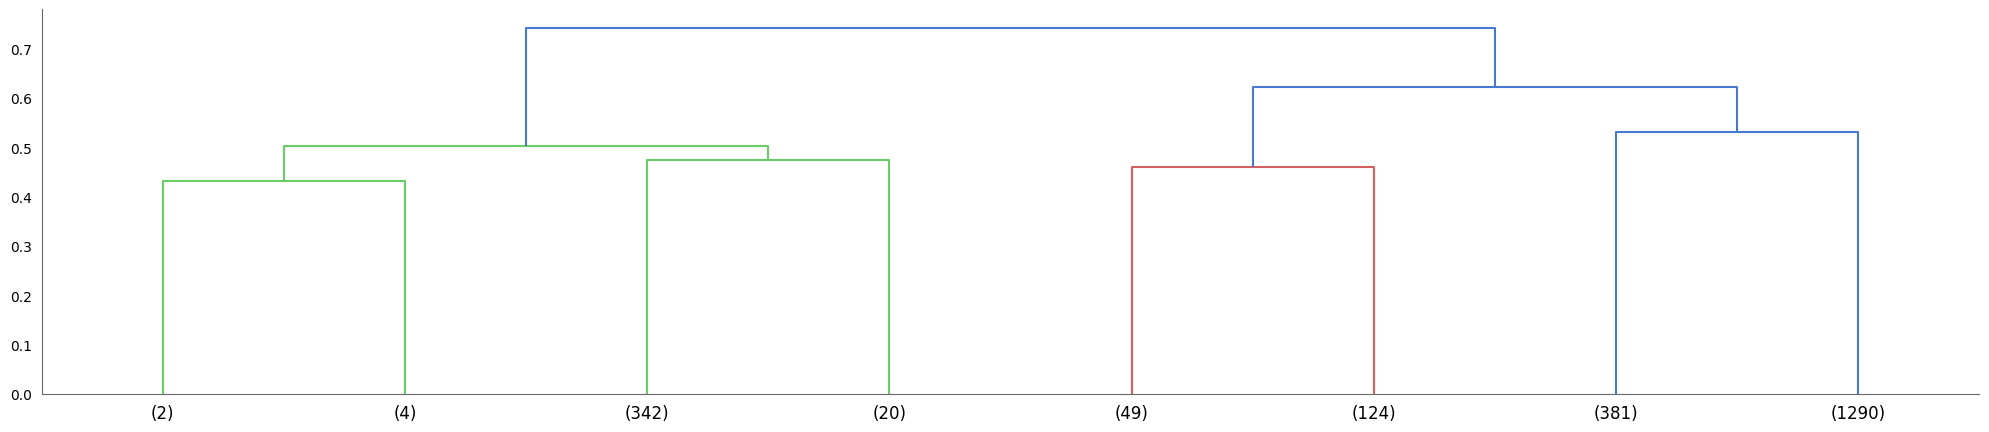

In [30]:
from scipy.cluster.hierarchy import fcluster, dendrogram

fig, axes = plt.subplots(1, 1, figsize=(25,5))
axes.tick_params(bottom=False, left=False)
axes.grid(False)
axes.spines[['top', 'right']].set_visible(False)
axes.spines[['left', 'bottom']].set_color('dimgray')

dn = dendrogram(linkage_matrix, truncate_mode='level', p=2, show_leaf_counts=True, ax=axes);
print(f"Leaves = {len(dn['leaves'])}")

#### Evaluation

In [41]:
kproto_df['hier_cluster'] = fcluster(linkage_matrix, t=8, criterion='maxclust') # Add cluster label to the dataframe
clean_df['hier_cluster'] = fcluster(linkage_matrix, t=8, criterion='maxclust') # Add cluster label to the dataframe

##### Cluster cardinality

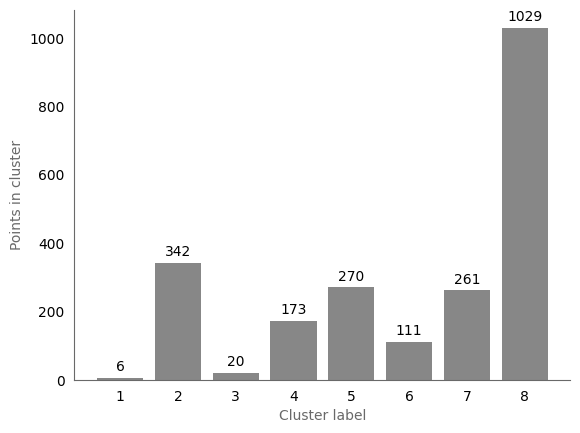

In [42]:
hier_cardinality = clean_df['hier_cluster'].value_counts().sort_index()

fig, axes = plt.subplots(1, 1, figsize=(6.4, 4.8))
axes.tick_params(bottom=False, left=False)
axes.grid(False)
axes.spines[['top', 'right']].set_visible(False)
axes.spines[['left', 'bottom']].set_color('dimgray')
cardinality_bars = axes.bar(hier_cardinality.index, hier_cardinality.values, color='dimgray', alpha=0.8)
axes.set_xlabel('Cluster label', color='dimgray')
axes.set_ylabel('Points in cluster', color='dimgray')
axes.bar_label(cardinality_bars, padding=3);

#### Profile

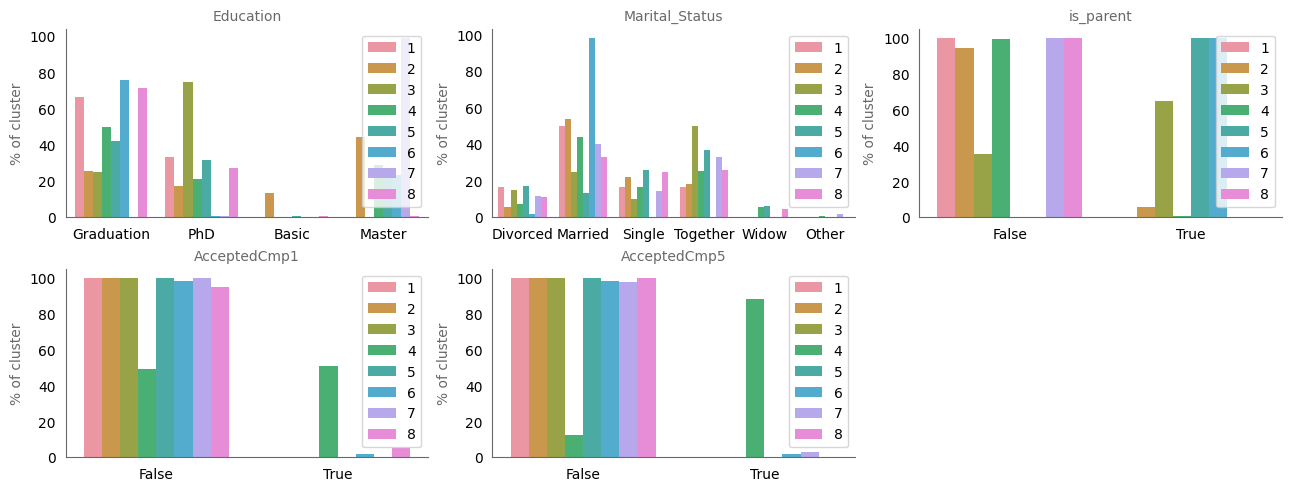

In [43]:
cat_cols = ['Education', 'Marital_Status', 'is_parent', 'AcceptedCmp1', 'AcceptedCmp5']
fig, axes = plt.subplots(2, 3, figsize=(6.4*2, 4.8), constrained_layout=True)
axes = axes.flatten()
for ax in axes:
    ax.tick_params(bottom=False, left=False)
    ax.grid(False)
    ax.spines[['top', 'right']].set_visible(False)
    ax.spines[['left', 'bottom']].set_color('dimgray')

for ax, col in zip(axes, cat_cols):
    data = clean_df.groupby(['hier_cluster', col])['hier_cluster'].count() / clean_df.groupby(['hier_cluster'])['hier_cluster'].count() * 100
    data.rename('perc', inplace=True)
    data = data.reset_index()
    data[['hier_cluster', col]] = data[['hier_cluster', col]].astype(str)
    sns.barplot(x=col, y='perc', hue='hier_cluster', data=data, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel('% of cluster', color='dimgray', size=10)
    ax.set_title(col, color='dimgray', size=10)
    ax.legend(loc='upper right')
fig.delaxes(axes[5])

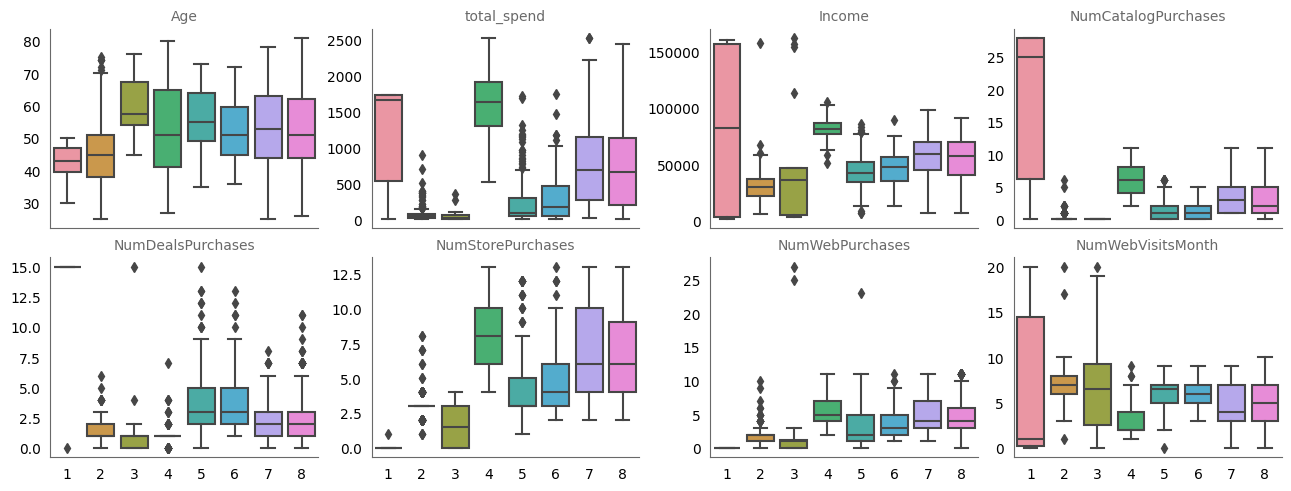

In [44]:
num_cols = ['Age', 'total_spend', 'Income', 'NumCatalogPurchases', 'NumDealsPurchases', 'NumStorePurchases', 'NumWebPurchases', 'NumWebVisitsMonth']
fig, axes = plt.subplots(2, 4, figsize=(6.4*2, 4.8), constrained_layout=True, sharex=True)
axes = axes.flatten()
for ax in axes:
    ax.tick_params(bottom=False, left=False)
    ax.grid(False)
    ax.spines[['top', 'right']].set_visible(False)
    ax.spines[['left', 'bottom']].set_color('dimgray')

for ax, col in zip(axes, num_cols):
    sns.boxplot(data=clean_df, x='hier_cluster', y=col, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(col, color='dimgray', size=10)

# Conclusion